# Connect to Google Drive

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')
%cd /content/drive/MyDrive/BachelorThesis/domain_analysis

Mounted at /content/drive
/content/drive/MyDrive/BachelorThesis/domain_analysis


# Load Domain Vocabularies

In [ ]:
def get_top_n_vocabs(n, vocabulary): # returns the top n most frequent words of vocab
  if n > len(vocabulary):
    raise Exception(f"{n} exceeds size of vocabulary...")
  vocab_list = [(k, v) for k, v in vocabulary.items()][:n]
  return set(dict(vocab_list))

In [ ]:
import json
VOCAB_SIZE = 10000 # number of most frequend vocabs that are taken into account when calculating vocab overlap

with open("allrecipes_vocabulary.json") as f:
    allrecipes_vocab = get_top_n_vocabs(VOCAB_SIZE, json.load(f))
with open("recipe1M_vocabulary.json") as f:
    recipe1m_vocab = get_top_n_vocabs(VOCAB_SIZE, json.load(f))
with open("recipeNLG_vocabulary.json") as f:
    recipeNLG_vocab = get_top_n_vocabs(VOCAB_SIZE, json.load(f))
with open("wiki_book_vocabulary.json") as f:
    wiki_book_vocab = get_top_n_vocabs(VOCAB_SIZE, json.load(f))

# Vocabulary Overlap

Calculate the overlap between all domain:

In [ ]:
# calculate the vocab overlap in percent of two sets
def vocab_overlap(set_a, set_b):
  overlap = set_a & set_b
  return round(2 * len(overlap) * 100 / (len(set_a) + len(set_b)), 1)

overlap_allrecipes_recipe1m = vocab_overlap(allrecipes_vocab, recipe1m_vocab)
overlap_allrecipes_recipeNLG = vocab_overlap(allrecipes_vocab, recipeNLG_vocab)
overlap_allrecipes_wiki_books = vocab_overlap(allrecipes_vocab, wiki_book_vocab)
overlap_recipe1m_recipeNLG = vocab_overlap(recipe1m_vocab, recipeNLG_vocab)
overlap_recipe1m_wiki_books = vocab_overlap(recipe1m_vocab, wiki_book_vocab)
overlap_recipeNLG_wiki_books = vocab_overlap(recipeNLG_vocab, wiki_book_vocab)
overlap_same = 100.0 # 100% overlap for two identical vocabs

Create a confusion matrix:

In [ ]:
matrix = [
          [overlap_same, overlap_recipe1m_recipeNLG, overlap_recipeNLG_wiki_books],
          [overlap_recipe1m_recipeNLG, overlap_same, overlap_recipe1m_wiki_books],
          [overlap_recipeNLG_wiki_books, overlap_recipe1m_wiki_books, overlap_same]
         ]
# matrix that includes allrecipes domain
matrix_with_allrecipes = [
          [overlap_same, overlap_recipe1m_recipeNLG, overlap_allrecipes_recipeNLG, overlap_recipeNLG_wiki_books],
          [overlap_recipe1m_recipeNLG, overlap_same, overlap_allrecipes_recipe1m, overlap_recipe1m_wiki_books],
          [overlap_allrecipes_recipeNLG, overlap_allrecipes_recipe1m, overlap_same, overlap_allrecipes_wiki_books],
          [overlap_recipeNLG_wiki_books, overlap_recipe1m_wiki_books, overlap_allrecipes_wiki_books, overlap_same]
         ]

Plot the confustion matrix:

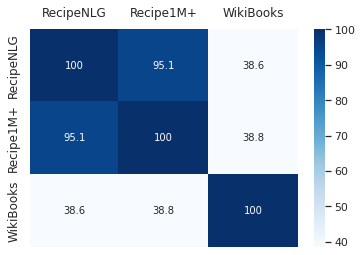

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_matrix = pd.DataFrame(matrix, ["RecipeNLG", "Recipe1M+","WikiBooks"], ["RecipeNLG", "Recipe1M+", "WikiBooks"])
sn.set(font_scale=1.0) # for label size
sn.heatmap(df_matrix, annot=True, annot_kws={"size": 10}, fmt='g', cmap='Blues') # font size
plt.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
fig = plt.gcf()
plt.show()

Save the matrix as png file

In [ ]:
fig.savefig(f"../figures/vocabulary_overlap{VOCAB_SIZE}.png", dpi=200, bbox_inches='tight')

# Leftovers
The following code is a leftover from earlier visualization approaches. 

## Word cloud
Visualize vocabulary in a word cloud. The bigger the words, the more often they occur in the dataset.

In [ ]:
!pip install wordcloud Pillow matplotlib

WikiBook


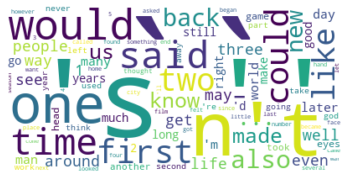

RecipeNLG


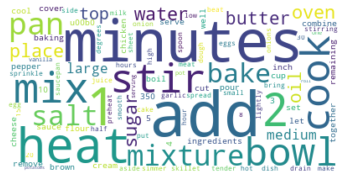

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def makeImage(text):
    wc = WordCloud(background_color="white", max_words=100)
    # generate word cloud
    wc.generate_from_frequencies(text)

    # show
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    fig = plt.gcf()
    plt.show()
    #fig.savefig(savepath, dpi=200, bbox_inches='tight') # save plot

print("WikiBook")
with open("wiki_book_vocabulary.json") as f:
  vocab = json.load(f)
makeImage(vocab)
print("RecipeNLG")
with open("recipeNLG_vocabulary.json") as f:
  vocab = json.load(f)
makeImage(vocab)